In [1]:
###### Program for collecting data when two phasescreens are placed ##### 

import numpy as np
import time
import aotools
import numpy as np
import scipy 
import astropy as ast
from itertools import islice
import psutil
import clr, os, winreg
import cv2
import random 


In [5]:
import matplotlib.pyplot as plt



In [2]:
#np.random.shuffle(cn2)
N = 100
delta = 0.005
L0 = 10
l0 = 0.005
details=np.zeros((1,7))
details[0][0]=N #nx
details[0][1]=N #ny
details[0][2]=delta #dx
details[0][3]=delta #dy
details[0][4]=3 #unitflag
details[0][5]=0 #decenter_x
details[0][6]=0 #decenter_y
matrix = np.zeros((N*N, 4))



In [7]:
class PythonStandaloneApplication(object):
    class LicenseException(Exception):
        pass
    class ConnectionException(Exception):
        pass
    class InitializationException(Exception):
        pass
    class SystemNotPresentException(Exception):
        pass

    def __init__(self, path=None):
        # determine location of ZOSAPI_NetHelper.dll & add as reference
        aKey = winreg.OpenKey(winreg.ConnectRegistry(None, winreg.HKEY_CURRENT_USER), r"Software\Zemax", 0, winreg.KEY_READ)
        zemaxData = winreg.QueryValueEx(aKey, 'ZemaxRoot')
        NetHelper = os.path.join(os.sep, zemaxData[0], r'ZOS-API\Libraries\ZOSAPI_NetHelper.dll')
        winreg.CloseKey(aKey)
        clr.AddReference(NetHelper)
        import ZOSAPI_NetHelper
        
        # Find the installed version of OpticStudio
        if path is None:
            isInitialized = ZOSAPI_NetHelper.ZOSAPI_Initializer.Initialize()
        else:
            # Note -- uncomment the following line to use a custom initialization path
            isInitialized = ZOSAPI_NetHelper.ZOSAPI_Initializer.Initialize(path)
        
        # determine the ZOS root directory
        if isInitialized:
            dir = ZOSAPI_NetHelper.ZOSAPI_Initializer.GetZemaxDirectory()
        else:
            raise PythonStandaloneApplication.InitializationException("Unable to locate Zemax OpticStudio.  Try using a hard-coded path.")

        # add ZOS-API referencecs
        clr.AddReference(os.path.join(os.sep, dir, "ZOSAPI.dll"))
        clr.AddReference(os.path.join(os.sep, dir, "ZOSAPI_Interfaces.dll"))
        import ZOSAPI

        # create a reference to the API namespace
        self.ZOSAPI = ZOSAPI

        # create a reference to the API namespace
        self.ZOSAPI = ZOSAPI

        # Create the initial connection class
        self.TheConnection = ZOSAPI.ZOSAPI_Connection()

        if self.TheConnection is None:
            raise PythonStandaloneApplication.ConnectionException("Unable to initialize .NET connection to ZOSAPI")

        self.TheApplication = self.TheConnection.CreateNewApplication()
        if self.TheApplication is None:
            raise PythonStandaloneApplication.InitializationException("Unable to acquire ZOSAPI application")

        if self.TheApplication.IsValidLicenseForAPI == False:
            raise PythonStandaloneApplication.LicenseException("License is not valid for ZOSAPI use")

        self.TheSystem = self.TheApplication.PrimarySystem
        if self.TheSystem is None:
            raise PythonStandaloneApplication.SystemNotPresentException("Unable to acquire Primary system")

    def __del__(self):
        if self.TheApplication is not None:
            self.TheApplication.CloseApplication()
            self.TheApplication = None
        
        self.TheConnection = None
    
    def OpenFile(self, filepath, saveIfNeeded):
        if self.TheSystem is None:
            raise PythonStandaloneApplication.SystemNotPresentException("Unable to acquire Primary system")
        self.TheSystem.LoadFile(filepath, saveIfNeeded)

    def CloseFile(self, save):
        if self.TheSystem is None:
            raise PythonStandaloneApplication.SystemNotPresentException("Unable to acquire Primary system")
        self.TheSystem.Close(save)

    def SamplesDir(self):
        if self.TheApplication is None:
            raise PythonStandaloneApplication.InitializationException("Unable to acquire ZOSAPI application")

        return self.TheApplication.SamplesDir

    def ExampleConstants(self):
        if self.TheApplication.LicenseStatus == self.ZOSAPI.LicenseStatusType.PremiumEdition:
            return "Premium"
        elif self.TheApplication.LicenseStatus == self.ZOSAPI.LicenseStatusTypeProfessionalEdition:
            return "Professional"
        elif self.TheApplication.LicenseStatus == self.ZOSAPI.LicenseStatusTypeStandardEdition:
            return "Standard"
        else:
            return "Invalid"
    
    def reshape(self, data, x, y, transpose = False):
        """Converts a System.Double[,] to a 2D list for plotting or post processing
        
        Parameters
        ----------
        data      : System.Double[,] data directly from ZOS-API 
        x         : x width of new 2D list [use var.GetLength(0) for dimension]
        y         : y width of new 2D list [use var.GetLength(1) for dimension]
        transpose : transposes data; needed for some multi-dimensional line series data
        
        Returns
        -------
        res       : 2D list; can be directly used with Matplotlib or converted to
                    a numpy array using numpy.asarray(res)
        """
        if type(data) is not list:
            data = list(data)
        var_lst = [y] * x;
        it = iter(data)
        res = [list(islice(it, i)) for i in var_lst]
        if transpose:
            return self.transpose(res);
        return res
    
    def transpose(self, data):
        """Transposes a 2D list (Python3.x or greater).  
        
        Useful for converting mutli-dimensional line series (i.e. FFT PSF)
        
        Parameters
        ----------
        data      : Python native list (if using System.Data[,] object reshape first)    
        
        Returns
        -------
        res       : transposed 2D list
        """
        if type(data) is not list:
            data = list(data)
        return list(map(list, zip(*data)))

if __name__ == '__main__':
    zos = PythonStandaloneApplication()
    
    # load local variables
    ZOSAPI = zos.ZOSAPI
    TheApplication = zos.TheApplication
    TheSystem = zos.TheSystem
    sampleDir = TheApplication.SamplesDir
    
    zmxfile = 'DataCollector_final.zmx'
    lensPath = os.path.join(os.getcwd())
    testFile = os.path.join(lensPath, zmxfile)      
      
    # Create New File
    
    


In [ ]:
    TheSystem.New(False)
    #TheSystem.LoadFile(, False)
    TheSystem.SaveAs(testFile)   
    start_time = time.time()
  

    #########################################   Setting up Zemax   ################################################
    
    TheLDE = TheSystem.LDE
    

   
    TheSystem.LDE.GetSurfaceAt(1).Thickness = 3300000
    TheSystem.LDE.GetSurfaceAt(1).IsStop = True
    analysis = TheSystem.Analyses.New_Analysis(ZOSAPI.Analysis.AnalysisIDM.PhysicalOpticsPropagation)
    analysisSettings = analysis.GetSettings()    
    
    # Temp file
    cfgFile = os.path.join(lensPath, 'sha.CFG')

    
    # Save the current settings to the temp file
    analysisSettings.SaveTo(cfgFile)

    # modify parameters, Caution!!! Change with care
    #analysisSettings.Modifysettings(cfgFile,'POP_START','0' )
    analysisSettings.ModifySettings(cfgFile, 'POP_START', '0')
    analysisSettings.ModifySettings(cfgFile, 'POP_END', '4')# Surface 3
    analysisSettings.ModifySettings(cfgFile, 'POP_BEAMTYPE', '0')# TopHat = 3, Gaussian = 0
    analysisSettings.ModifySettings(cfgFile, 'POP_PARAM1', '100')# X Waist
    analysisSettings.ModifySettings(cfgFile, 'POP_PARAM2', '100')# Y Waist
    analysisSettings.ModifySettings(cfgFile, 'POP_SAMPX','6')
    analysisSettings.ModifySettings(cfgFile, 'POP_SAMPX','6')
    #analysisSettings.ModifySettings(cfgFile, 'POP_AUTO','0')
    analysisSettings.ModifySettings(cfgFile, 'POP_WIDEX','4000')# X-Width
    analysisSettings.ModifySettings(cfgFile, 'POP_WIDEY','4000')# Y-Width
    
    # load the temp file
   

    
    
     ########################################  Different Phasescreens   ##########################################

            
    for j in range(2):

        TheLDE.InsertNewSurfaceAt(j+1)
        Surface = TheLDE.GetSurfaceAt(j+1)
        SurfaceType_Gridphase = TheLDE.GetSurfaceAt(1+j).GetSurfaceTypeSettings(ZOSAPI.Editors.LDE.SurfaceType.GridPhase)
        Surface.ChangeType(SurfaceType_Gridphase)
        Surface.Thickness = 3300000.0

### Getting gaussian#####
    analysisSettings.LoadFrom(cfgFile) 
    analysis.ApplyAndWaitForCompletion()
    res=analysis.GetResults() 
    imgarr=res.GetDataGrid(0).Values
    img = zos.reshape(imgarr, imgarr.GetLength(0), imgarr.GetLength(1))
    img0 = np.flipud(img)
    dx0=res.GetDataGrid(0).Dx
    output0 = np.flipud(img0[512-50:512+50,512-50:512+50])   
    
    #output0 = cv2.resize(output0,(50,50))
        
 #### Phasescreens ####
    for p in range (4,7):
        logcn2 = np.zeros(0)
        for i in range(5000):
            rand = int.from_bytes(os.urandom(8), byteorder="big") / ((1 << 64) - 1)
            logcn2 = np.append(logcn2,-13*(1-rand)-16*rand) 
        cn2 = 10**(logcn2)

        f=open('D:\\Nivedita\\Data\\Difference\\Twops_3\\cn2_'+str(p)+'.DAT','w')
        np.savetxt(f,cn2)
        f.close()

        f2 = open('D:\\Nivedita\\Data\\Difference\\Twops_3\\donediffimg_'+ str(p)+'.DAT','w')

        for i in range(5000):
            r0 = aotools.turbulence.atmos_conversions.cn2_to_r0(cn2[i], lamda=5.5e-07)

            for j in range (2):
                phi= aotools.turbulence.phasescreen.ft_phase_screen(r0, N, delta, L0, l0, FFT = None, seed = random.randint(0,5000))
                file = open('phscrn'+str(j)+'.DAT', 'ab')

                #  File used in zemax has first row with details and then 4 cols with 1st col having (N*N) 
                #  size with phi as values.
                #  The other three columns (3 double derivatives wrt x and y) being zero 

                file.truncate(0)
                np.savetxt(file,details)# firstrow
                k = 0
                for m in range(N):# firstcolumn
                    for n in range(N):
                        matrix[k][0] = phi[m][n]
                        k = k+1
                np.savetxt(file,matrix)
                file.close()        
                phasefile = 'phscrn'+str(j)+'.DAT'
                phasescreen = os.path.join(lensPath, phasefile)
                Surface = TheLDE.GetSurfaceAt(j+1)
                Surface.ImportData.ImportDataFile(phasescreen)
                phi = cv2.resize(phi,(50,50))
                f1 = open('D:\\Nivedita\\Data\\Difference\\Twops_3\\phasescrn'+str(j+1)+'_'+ str(p)+'.DAT','ab')
                np.savetxt(f1,phi)
                f1.close()

            TheSystem.LDE.GetSurfaceAt(j+2).IsStop = True
            analysisSettings.LoadFrom(cfgFile)
            analysis.ApplyAndWaitForCompletion()                
            res=analysis.GetResults() 
            imgarr=res.GetDataGrid(0).Values
            img = zos.reshape(imgarr, imgarr.GetLength(0), imgarr.GetLength(1))
            img = np.flipud(img)
            Nx = 100*dx0/res.GetDataGrid(0).Dx
            output = img[512-int(Nx/2):512+int(Nx/2),512-int(Nx/2):512+int(Nx/2)]
            output =np.flipud(cv2.resize(output,(100,100)))
           
            #print(np.shape(output))

            diffout = output-output0
            #diffout = cv2.resize(diffout,(50,50))
            np.savetxt(f2,diffout)

    
    f2.close()
    analysis.Close()
    TheSystem.Save()
    print("--- %s seconds ---" % (time.time() - start_time))

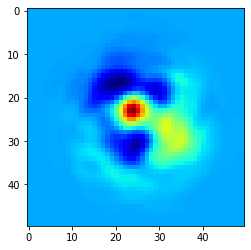

In [17]:
 plt.imshow(diffout,cmap ='jet')

In [13]:
f2.close()

In [6]:
    ###Close Zemax#####
    del zos
    zos = None  

In [51]:
pythondat = np.loadtxt('D:\\Nivedita\\Data\\Difference\\Twops_2\\donediffimg_2.DAT',dtype = 'float')


(250000, 50)


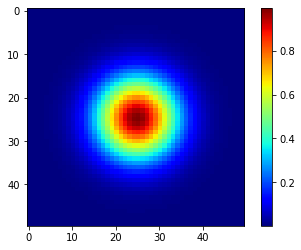

In [50]:
print(np.shape(pythondat))
plt.imshow(output0,cmap = 'jet')
plt.colorbar()

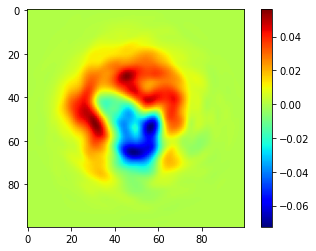

In [27]:

data_2 = np.loadtxt('zemaxdata.txt',dtype = 'float',skiprows =16,encoding = 'utf-16')
plt.imshow(cv2.resize(data_2[512-int(Nx/2):512+int(Nx/2),512-int(Nx/2):512+int(Nx/2)],(100,100))-output0,cmap='jet')
#plt.clim(-0.005, 0.035)
plt.colorbar()

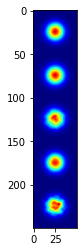

In [11]:
###Plotting the Phase screen #######

#arr = np.resize(arr,(100,100))
#nparr=arr[1500:2000,:]
nparr = arr[0:250,:]
#print(nparr[0])
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
imshow(nparr,cmap='jet')
plt.savefig('Recheck1.png')


NameError: name 'plt' is not defined

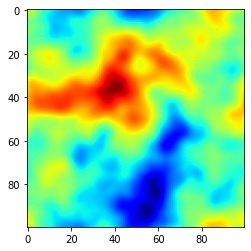

In [40]:
nparr = arr[49900:50000,:]
#print(nparr)
#from matplotlib.pyplot import imshow
imshow(nparr,cmap='jet')
plt.savefig('figure2.png')

In [ ]:
text = "Nice lookin images Nivz!"